![image.png](attachment:image.png)

# 모델별 성능 확인을 위한 함수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    plot_predictions(name_, pred, actual)
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

# 규제 (Regularization)
- 학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것

## L2 규제 (L2 Regularization)

- 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다.
- λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

## L1 규제 (L1 Regularization)

- 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다.
- 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다.
- L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다

## Ridge (L2 Regularization)
- L2 규제 계수를 적용합니다.
- 선형회귀에 가중치 (weight)들의 제곱합에 대한 최소화를 추가합니다.


### 주요 hyperparameter
- alpha: 규제 계수

### 수식
- Error=MSE+αw2

## 릿지 회귀(Ridge Regression)

- L2-norm 패널티를 더한 선형회귀 model
  - 기존 선형 모델에 규제항을 추가해 overfitting을 해결
- 가중치(회귀계수)의 절대값 규제(regularization)하여 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 한다.
- 릿지 회귀는 회귀계수를 0에 가깝게하지만 0으로 만들지 않음(이미지 참고)

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  - $\alpha$: 사용자가 지정하는 매개변수
  - $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐
  - $\alpha$가 없으면 일반적인 선형 회귀와 같다.

__참고__ 
- 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
  - 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생

### 보스턴 주택 가격에 대한 릿지 회귀

In [1]:
!pip install scikit-learn

In [2]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [36]:
x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

c:\Users\KOJUNSUNG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [37]:
model = Ridge(alpha = 0.2) # 값이 커질 수록 큰 규제입니다.
model.fit(x_train, y_train)

Ridge(alpha=0.2)

- coef_는 feature의 가중치(회귀계수 w)를 보여줍니다.

- 가중치(weight)를 토대로 회귀 예측시 어떤 feature가 주요하게 영향을 미쳤는지 보여 줍니다.

In [38]:
model.coef_

array([-1.24441120e-01,  5.86964886e-02,  5.07010561e-02,  2.03534453e+00,
       -1.56262700e+01,  3.40450115e+00,  6.12053893e-03, -1.36319332e+00,
        3.52318216e-01, -1.47004810e-02, -9.07582851e-01,  9.47655263e-03,
       -5.15505844e-01])

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7260980010458834
Test Data Score: 0.7811137604441751


In [ ]:
import matplotlib.pyplot as plt
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') 
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

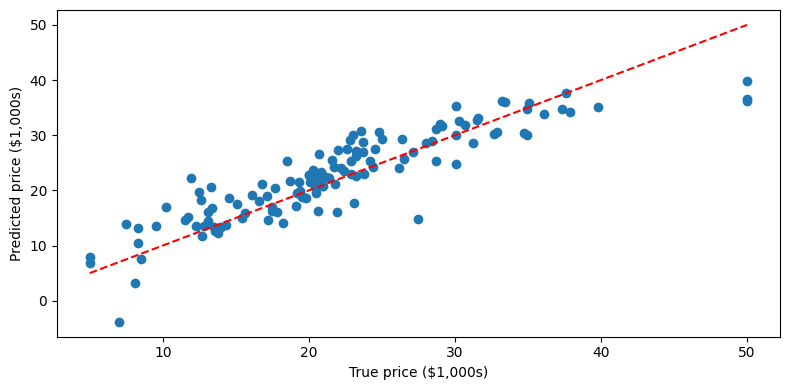

In [ ]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 릿지 회귀
- alpha 값을 0.1, 0.2, 0.3, 0.4, 0.5 까지 작성하여 비교해 보세요 
- alpha 가 너무 작으면 overfitting, 너무 크면  underfitting 발생

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [7]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [ ]:
# 방법1
print(model.score(x_test, y_test))

# 방법2
from sklearn.metrics import r2_score
print(r2_score(y_test, model.predict(x_test)))

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

models = [Ridge(alpha = i) for i in np.arange(0, 1, 0.1)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}")
    print(f'Train Data Score: {model.score(x_train, y_train)}')
    print(f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

alpha : 0.0
Train Data Score: 0.6061438488204132
Test Data Score: 0.606441183606014
alpha : 0.1
Train Data Score: 0.606143848422757
Test Data Score: 0.6064409109590876
alpha : 0.2
Train Data Score: 0.6061438472303556
Test Data Score: 0.6064406376492066
alpha : 0.30000000000000004
Train Data Score: 0.6061438452440591
Test Data Score: 0.6064403636771345
alpha : 0.4
Train Data Score: 0.6061438424647159
Test Data Score: 0.6064400890436321
alpha : 0.5
Train Data Score: 0.6061438388931744
Test Data Score: 0.6064398137494609
alpha : 0.6000000000000001
Train Data Score: 0.6061438345302816
Test Data Score: 0.6064395377953813
alpha : 0.7000000000000001
Train Data Score: 0.6061438293768832
Test Data Score: 0.6064392611821516
alpha : 0.8
Train Data Score: 0.6061438234338243
Test Data Score: 0.6064389839105307
alpha : 0.9
Train Data Score: 0.6061438167019488
Test Data Score: 0.6064387059812755


In [21]:
# LinearRegression 에 대한 결과
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6061438488204132
Test Data Score: 0.6064411836060144


## 라쏘 회귀(Lasso Regression)
- L1-norm 패널티를 더한 선형회귀 model
- 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
- **불필요한 회귀계수를 급격하게 감소시켜 0으로 만들고** 제거(이미지 참고)
    - model 을 단순하게 만들어 overfitting 을 방지 한다. 

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

- 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

/home/apollo/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [ ]:
model = Lasso(alpha = 0.1)
#Lasso 모델에 너무 큰 alpha 계수를 적용하면 대부분의 feature들의 가중치가 0으로 수렴합니다.
# model = Lasso(alpha = 0.01)
# model = Lasso(alpha = 0.001)
model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7288387244471606
Test Data Score: 0.7113726807733725


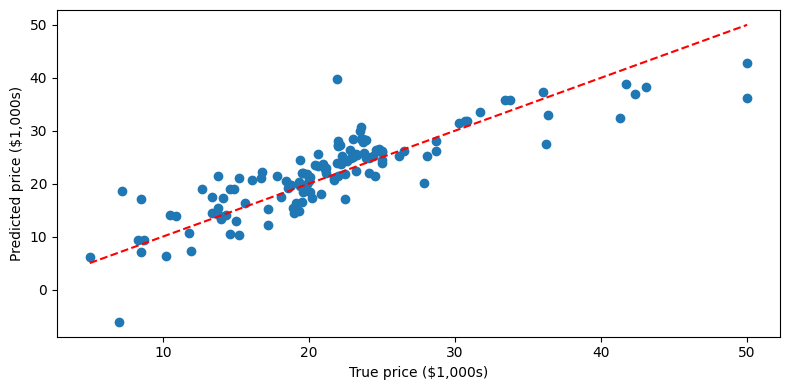

In [ ]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

## 신축망 (Elastic-Net)

- 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델. 일종의 앙상블 모델이다.
- 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 준다.

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

- $\alpha$: 규제의 강도를 조절하는 매개변수
- $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
x, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y)

/home/apollo/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [ ]:
model = ElasticNet(alpha=0.001, l1_ratio=0.5)
model.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [ ]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7463031282455064
Test Data Score: 0.7137581531072112


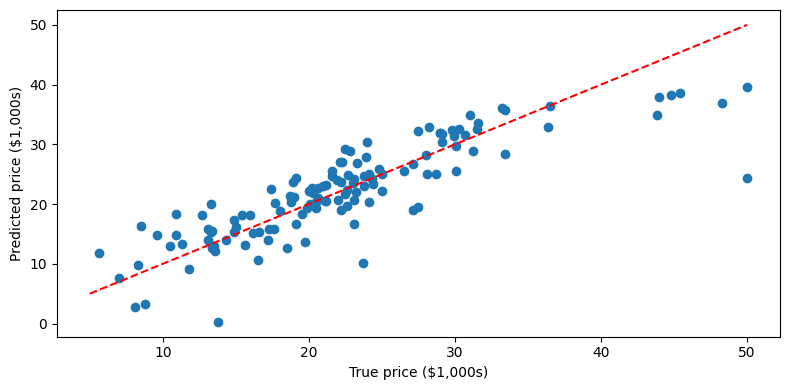

In [ ]:
x_test_predict = model.predict(x_test)
plot_boston_price(y_test, x_test_predict)

### 캘리포니아 주택 가격에 대한 신축망

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [42]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [22]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
models = [ElasticNet(alpha = 0.1**i, l1_ratio = 0.5) for i in np.arange(0, 4)]
trained_models = [] 

for model in models:
    model.fit(x_train, y_train)
    print(f"alpha : {model.alpha}")
    print(f'Train Data Score: {model.score(x_train, y_train)}')
    print(f'Test Data Score: {model.score(x_test, y_test)}')
    trained_models.append(model)

In [25]:
model=ElasticNet(alpha=0.05, l1_ratio=0.5)
model.fit(x_train,y_train)

ElasticNet(alpha=0.05)

In [28]:
model.score?

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_ou

In [33]:
#model.score(X, y, sample_weight=None)
y_test_predict = model.predict(x_test)
print('train score ',model.score(x_train,y_train))
print('test score ',model.score(x_test,y_test))

train score  0.5967709773798977
test score  0.5622153101670821


In [34]:
y_test_predict

array([2.36520375, 2.83912646, 3.25723169, ..., 1.51178887, 2.38602668,
       2.53206431])

# **MinMaxScaler (정규화)**
- 정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

- 정규화가 표준화와 다른 가장 큰 특징은 모든 데이터가 0 ~ 1 사이의 값을 가집니다.

- 즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

# **StandardScaler (표준화)**
- 표준화는 데이터의 평균을 0 분산 및 표준편차를 1로 만들어 줍니다.

### 표준화를 하는 이유

- 서로 다른 통계 데이터들을 비교하기 용이하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 분포를 단순화 시키고 비교를 용이하게 합니다.

![hard](https://t1.daumcdn.net/cfile/tistory/999EC6335CDE8D8131)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)

# 파이프라인 (pipeline)
- scikit-learn의 전처리(pre-processing)용 모듈과 모델의 학습 기능을 파이프라인으로 합칠 수 있습니다.

- 파이프라인으로 결합된 모형은 원래의 모형이 가지는 fit, predict 함수를 가집니다.
- 파이프라인에 정의된 순서에 따라 전처리 모듈이 먼저 호출되어 전처리 과정을 거친 후 모델이 학습하게 됩니다.

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
pipeline.fit(x_train, y_train)
pipeline_pred = pipeline.predict(x_test)
mse_eval('MinMax ElasticNet', pipeline_pred, y_test)